In [1]:
import pandas as pd
url="https://bit.ly/2MGov4j"
df = pd.read_csv(url)

In [2]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


levels = len(pd.value_counts(df['Description']))
levels



In [6]:

len(df.Description.value_counts())

3

In [7]:
df.Description.value_counts()

Normal    4992
Warm      2507
Cold      2501
Name: Description, dtype: int64

In [8]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [9]:
df_dummies.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,0,0


In [10]:
print('There are {} columns in df_dummies'	.format(df_dummies.shape[1]))

There are 9 columns in df_dummies


# Shuffle & Split

In [20]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_dummies, random_state=42)

In [21]:
DV = 'Temperature_c'

X = df_shuffled.drop(DV, axis=1)

y = df_shuffled[DV]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
pwd

'/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project'

## Fitting a Simple Linear Regression Model and Determining the Intercept and Coefficient

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
model.fit(X_train[['Humidity']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
intercept = model.intercept_

coefficient = model.coef_

#model.score(X_test,y_test)

print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity)'.format(intercept, coefficient[0]))

##  Generating Predictions and Evaluating the Performance of a Simple Linear Regression Model

In [23]:
predictions = model.predict(X_test[['Humidity']])

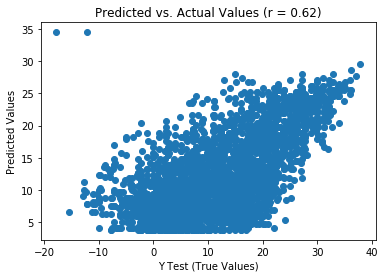

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import pearsonr

plt.scatter(y_test, predictions)

plt.xlabel('Y Test (True Values)')

plt.ylabel('Predicted Values')

plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))

plt.show()

 - We will ceate a density plot of the residuals to check wether the model fits the data very well abd have normally distributed residuals. 

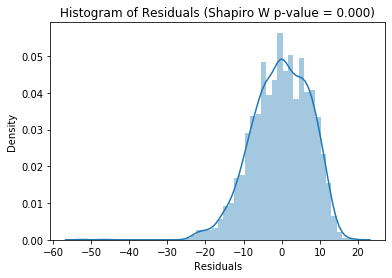

In [32]:
from scipy.stats import shapiro
import seaborn as sns
sns.distplot((y_test - predictions), bins = 50)

plt.xlabel('Residuals')

plt.ylabel('Density')

plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))

plt.show()

In [35]:
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame({'Metric': ['MAE',

                                      'MSE',

                                      'RMSE',

                                      'R-Squared'],

                          'Value': [metrics.mean_absolute_error(y_test, predictions),

                                    metrics.mean_squared_error(y_test, predictions),

                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),

                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

print(metrics_df)

      Metric   Value
0        MAE   6.052
1        MSE  56.187
2       RMSE   7.496
3  R-Squared   0.389


- Mean absolute error (MAE) is the average absolute difference between the predicted values and the actual values. - Mean squared error (MSE) is the average of the squared differences between the predicted and actual values. 
- Root mean squared error (RMSE) is the square root of the MSE. 
- R-squared tells us the proportion of variance in the dependent variable that can be explained by the model. 

Thus, in this simple linear regression model, humidity explained only 38.9% of the variance in temperature. Additionally, our predictions were within ± 6.052 degrees Celsius.